In [39]:
import sys
sys.path.insert(0, '../BO')

In [40]:
from gp import *
import numpy as np
from sklearn.datasets import fetch_mldata
from BN import *

In [41]:
# Load and format the training and testing data
mnist = fetch_mldata('MNIST original')

In [42]:
BN = BN(mnist)

In [43]:
loss = BN.train_bayesian_nn

In [44]:
bounds = np.array([[-15., 0.0], [5., 150.], [5., 2000.], [1., 5.], [0.00001, 1.], [0.00001, 1.], [0.00001, 1.], [0.00001, 2.], [0.00001, 2.]])
# maxeps specifies how many BOs we want to run
maxeps = 6
# n_iters is number of iterations we want for each run of BO
n_iters = 100
acqui_eva_num = 5
greater_is_better = False
n_pre_samples = 5
coor_sigma = 1 * np.array([0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2])
burn_in = 20
input_dimension = 9
mode = 'MAP'
acqui_mode = 'MCMC'
acqui_sample_num = 5
process_sample_mode = 'abs'
prior_mode ='exp_prior'
likelihood_mode = 'normal_likelihood'

In [ ]:
y_list = list()
time_list = list() 
for i in range(n_iters):
    y_list.append(list())
for i in range(n_iters):
    time_list.append(list())

for j in range(maxeps):
    print ('Running %d episode' % (j + 1))
    xp, yp, timep = bayesian_optimisation(coor_sigma = coor_sigma, 
                                   burn_in = burn_in, 
                                   input_dimension = input_dimension,
                                   n_iters = n_iters, 
                                   sample_loss = loss, 
                                   bounds = bounds, 
                                   n_pre_samples = n_pre_samples, 
                                   acqui_eva_num = acqui_eva_num,  
                                   greater_is_better=greater_is_better, 
                                   mode = mode, 
                                   acqui_mode = acqui_mode, 
                                   acqui_sample_num = acqui_sample_num,   
                                   process_sample_mode = process_sample_mode, 
                                   prior_mode = prior_mode, 
                                   likelihood_mode = likelihood_mode)
    y_train = yp[n_pre_samples:]
    for idx in range(len(y_train)):
        if idx == 0:
            y_list[idx].append(y_train[idx])
        else:
            y_list[idx].append(np.min(y_train[:idx]))
            
    for i in range(len(y_train)):
        time_list[i].append(timep[i])

Running 1 episode
Start presampling...
	Learning rate: 0.000404744451607, training epochs: 67, batch size: 526, n_samples: 4, prior_sigma: 4.4973946, init_sigma_weights_mu:  4.5750747, init_sigma_biases_mu: 3.1472955, init_sigma_weights_rho: 4.414118, init_sigma_biases_rho: 3.9362009
Accuracy 0.0995238095238
	Learning rate: 0.00811002085406, training epochs: 30, batch size: 197, n_samples: 4, prior_sigma: 4.6369543, init_sigma_weights_mu:  1.1224715, init_sigma_biases_mu: 0.52538204, init_sigma_weights_rho: 2.2190282, init_sigma_biases_rho: 0.74228865
Accuracy 0.220952380952
	Learning rate: 0.310500544054, training epochs: 146, batch size: 11, n_samples: 4, prior_sigma: 4.7065544, init_sigma_weights_mu:  1.9124534, init_sigma_biases_mu: 1.4472452, init_sigma_weights_rho: 3.7374692, init_sigma_biases_rho: 1.4276938
Accuracy 0.0995238095238
	Learning rate: 1.13249450205e-06, training epochs: 111, batch size: 789, n_samples: 3, prior_sigma: 3.7352433, init_sigma_weights_mu:  4.932752, ini

In [8]:
def return_mean_std(y_list):
    mean_list = list()
    std_list = list()
    for one_list in y_list:
        mean_list.append(np.mean(one_list))
        std_list.append(np.std(one_list))
    return mean_list, std_list
mean_list_MCMC, std_list_MCMC = return_mean_std(y_list)

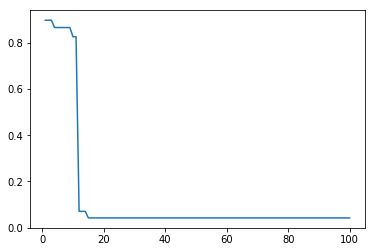

0.042095238095238074

In [11]:
import matplotlib.pyplot as plt
x_MCMC = [i+1 for i in range(len(y_list))]

plt.errorbar(x_MCMC, mean_list_MCMC, yerr = std_list_MCMC, fmt = '-')

plt.show()
min(mean_list_MCMC)

In [11]:
import pickle
opt_dict = {}
opt_dict['y_list'] = y_list
with open('BN_MCMC_EXP.pkl','wb') as file:
    pickle.dump(opt_dict, file)

In [12]:
with open('BN_MCMC_EXP.pkl', 'rb') as pickle_file:
    data1 = pickle.load(pickle_file)